In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from sklearn.utils import resample
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report

# df = pd.read_csv('./data/heart.csv')
# df = df.dropna(axis=1)
# X = df.drop('target', axis=1)
# y = df['target']

dataset = fetch_openml(name="iris")
df = pd.DataFrame(data=np.c_[dataset['data'], dataset['target']],
                            columns=dataset['feature_names'] + ['target'])
print(df.shape)
df.head()

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)
scoring="accuracy"

def count_class(y):
    unique, counts = np.unique(y, return_counts=True)
    uqc = dict(zip(unique, counts))
    print(uqc)


count_class(y_train)

(150, 5)
{'Iris-setosa': 40, 'Iris-versicolor': 40, 'Iris-virginica': 40}


/Users/bishwash.aryal/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/datasets/openml.py:308: UserWarning: Multiple active versions of the dataset matching the name iris exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [2]:
#Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def plot_learning_curve(estimator, title, X, y, scoring="accuracy"):
    
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    n_jobs=None
    train_sizes=np.linspace(.1, 1.0, 20)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-Validation score")

    plt.legend(loc="best")
    return plt

def plot_model_complexity_curve(estimator, title, X, y, param_grid, scoring="accuracy"):
    param = list(param_grid.keys())[0]

    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
    gs = GridSearchCV(estimator,
                  scoring=scoring,
                  cv=cv,
                  param_grid=param_grid)
    gs.fit(X, y)
    results = gs.cv_results_

    train_scores_mean = results[f"mean_train_score"]
    test_scores_mean = results[f"mean_test_score"]
    

    x_axis = results[f"param_{param}"].data
    new_axis = []
    for p in x_axis:
        if isinstance(p, tuple):
            j = '_'.join([str(x) for x in p])
            new_axis.append(j)
    if new_axis:
        x_axis = np.array(new_axis)
            
    plt.figure()
    plt.title(title)
    plt.xlabel(f"Model Complexity ({param})")
    plt.ylabel(scoring)
    plt.grid()
    plt.plot(x_axis, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(x_axis, test_scores_mean, 'o-', color="g",
             label="Cross-Validation score")
    plt.legend(loc="best")
    return plt  

def search_gridcv(estimator, X, y, param_grid, scoring="accuracy"):
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    gs = GridSearchCV(estimator,
                  scoring=scoring,
                  cv=cv,
                  param_grid=param_grid)
    gs.fit(X, y)
    results = gs.cv_results_
    print(gs.best_estimator_)
    print(gs.best_score_)
    print(gs.best_params_)
    
def boxplot_cv_scores(models, X, y, scoring=scoring):
    results = []
    names = []
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for name, estimator in models:
        _results = cross_val_score(estimator, X, y, cv=cv, scoring=scoring)
        results.append(_results)
        names.append(name)
        print(f"{name}: {_results.mean()} ({_results.std()})")

    # boxplot for algorithm comparision
    fig = plt.figure()
    fig.suptitle("Algorithm Comparision")
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
def accuracy_score_report(models, X_train, y_train, X_test, y_test, scoring=scoring):
    for name, estimator in models:
        clf = estimator.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=["good", "bad"])
        print(f"{name}: {score}")


In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier()
estimator = AdaBoostClassifier(base_estimator=base_estimator)
clf = estimator.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")
print(estimator.get_params())

Accuracy Score: 1.0
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

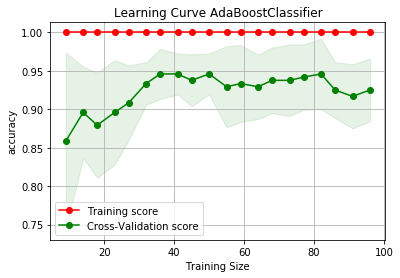

In [5]:
base_estimator = DecisionTreeClassifier()
estimator = AdaBoostClassifier(base_estimator=base_estimator)
plot_learning_curve(estimator, f"Learning Curve AdaBoostClassifier", X_train, y_train)

<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

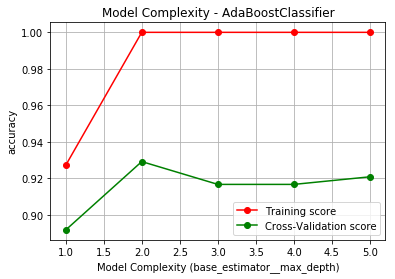

In [16]:
base_estimator = DecisionTreeClassifier()
estimator = AdaBoostClassifier(base_estimator=base_estimator)
title = "Model Complexity - AdaBoostClassifier"
param_grid = {"base_estimator__max_depth" : range(1, 6)}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")


<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

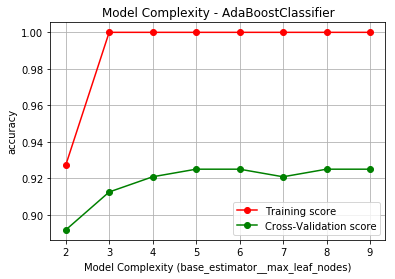

In [12]:
base_estimator = DecisionTreeClassifier()
estimator = AdaBoostClassifier(base_estimator=base_estimator)
title = "Model Complexity - AdaBoostClassifier"
param_grid = {"base_estimator__max_leaf_nodes" :   np.arange(2, 10)}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")

<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

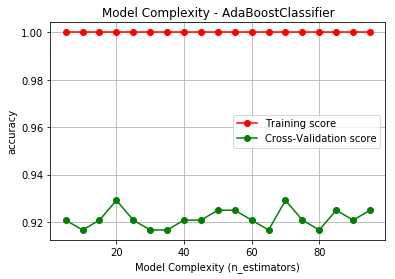

In [7]:
base_estimator = DecisionTreeClassifier()
estimator = AdaBoostClassifier(base_estimator=base_estimator)
title = "Model Complexity - AdaBoostClassifier"
param_grid = {"n_estimators": range(5,100,5)}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")

<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

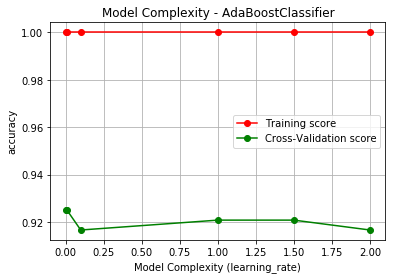

In [9]:
base_estimator = DecisionTreeClassifier()
estimator = AdaBoostClassifier(base_estimator=base_estimator)
title = "Model Complexity - AdaBoostClassifier"
param_grid = {"learning_rate": [.001,.01,.1,1, 1.5, 2]}
plot_model_complexity_curve(estimator, title, X_train, y_train, param_grid, scoring="accuracy")

In [33]:
base_estimator = DecisionTreeClassifier()
estimator = AdaBoostClassifier(base_estimator=base_estimator)

all_param_grid = {
    "base_estimator__max_depth" : np.arange(1, 6),
    "base_estimator__max_leaf_nodes" :   np.arange(2, 10),
    "n_estimators": range(10,30,10),
    "learning_rate": [.5,1,1.5]
}
search_gridcv(estimator, X_train, y_train, all_param_grid, scoring="accuracy")

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=20, random_state=None)
0.8183035714285715
{'base_estimator__max_depth': 4, 'base_estimator__max_leaf_nodes': 9, 'learning_rate': 1, 'n_estimators': 20}


<module 'matplotlib.pyplot' from '/Users/bishwash.aryal/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

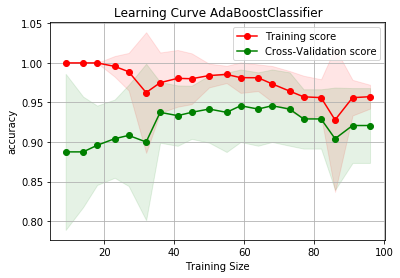

In [20]:
base_estimator = DecisionTreeClassifier(max_depth=1)
estimator = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=20, learning_rate=1)
plot_learning_curve(estimator, f"Learning Curve AdaBoostClassifier", X_train, y_train)

In [30]:
base_estimator = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=9)
estimator = AdaBoostClassifier(base_estimator=base_estimator)
clf = estimator.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")
print(estimator.get_params())

Accuracy Score: 0.8642857142857143
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 4, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': 9, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
